# Titanic: Aprendizaje Automático del Desastre


### Resumen

Los datos han sido divididos en 2 grupos:

training set (train.csv)
test set (test.csv)

El conjunto de entrenamiento deberá ser utilizado para construir el/los modelo/s de aprendizaje automático. Para el conjunto de entrenamiento, se dará el resultado (también conocido como "verdad básica") para cada pasajero. Su modelo, deberá estar basado en "características" como el géneros o clase de los pasajeros. También puedes jugar con algunas características para crear las tuyas propias.

El conjunto de prueba debe usarse para ver qué tan bien se desempeña su modelo en datos sin clasificar. Para el conjunto de pruebas, no proporcionamos la verdad básica para cada pasajero. Debes poder predecir estos resultados. Para cada pasajero en el conjunto de pruebas, use el modelo que entrenó para predecir si sobrevivieron o no al hundimiento del Titanic.

También incluimos gender_submission.csv, un conjunto de predicciones que asumen que todas las pasajeros y solo las mujeres sobreviven, como ejemplo de cómo debería ser un archivo de envío


## Parte 1: Carga y Preprocesamiento de Datos

En esta parte se limpian los datos para realizar un mayor análisis y modelo predictivo de estos: 

- ¿Qué variables se presentan en el conjunto de datos?
- ¿Qué tipo de variables posee el conjunto de datos?
- ¿Poseen las variables del conjunto de entrenamiento y el conjunto de prueba las mismas características?
- ¿Existen atributos con propiedades vacías?
- ¿Existen outliers en los conjuntos de datos?

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Opening Datasets
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
# Mostramos el conjunto de datos de entrenamiento
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Mostramos el conjunto de datos de prueba
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Diccionario de Datos

- PassengerId: Identificador de Pasajero
- Survived: 0 = No, 1 = Sí
- Pclass: Clase del Pasaje 1 = 1st, 2 = 2nd, 3 = 3rd
- Name: Nombre del Pasajero
- Sex: Sexo del Pasajero
- Age: Edad del Pasajero
- SibSp: # de hermanos / esposas abordo del Titanic
- Parch: # de padres / hijos abordo del Titanic
- Ticket: Código de Pasaje
- Fare: Tarifa de Pasaje
- Cabin: Número de Cabina
- Embarked: Puerto de Embarque - C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
# Forma del conjunto de entrenamiento
print('El conjunto de datos de entrenamiento (training) posee ', 
      train_data.shape[0], ' filas y ', train_data.shape[1], 
      ' columnas.')
# Forma del conjunto de pruebas
print('El conjunto de datos de prueba (testing) posee ', 
      test_data.shape[0], ' filas y ', test_data.shape[1], 
      ' columnas.')

El conjunto de datos de entrenamiento (training) posee  891  filas y  12  columnas.
El conjunto de datos de prueba (testing) posee  418  filas y  11  columnas.


### Obs.

El conjunto de datos de entrenamiento posee un atributo más que el conjunto de datos de testing, que viene siendo la variable de decisión (sobrevive o no sobrevive). Además el conjunto de datos de entrenamiento posee más observaciones que el conjunto de datos de testing (891 contra 418).

Ahora se procede a comparar los conjuntos de datos de entrenamiento y prueba para ver si sus variables numéricas poseen características númericas similares (como por ejemplo media, varianza, cuartiles, etc.)

In [6]:
# Descripción general de conjunto de entrenamiento
train_data[['Pclass','Age','SibSp','Parch','Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Descripción general de conjunto de pruebas
test_data[['Pclass','Age','SibSp','Parch','Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


### Obs.

Ambos conjuntos de datos no poseen grandes diferencias en variables numéricas, por ende, se puede trabajar co ambos utilizando criterios similares.

Ahora se procede a chequear si existen valores nulos dentro del conjunto de entrenamiento y prueba.

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Obs
En el conjunto de entrenamiento se tiene como NaN's:
- 177 Registros con el atributo "Age"
- 687 Registros con el atributo "Cabin"
- 2 Registros con el atributo "Embarked"

En el conjunto de pruebas se tiene como NaN's:
- 86 Registros con el atributo "Age"
- 327 Registros con el atributo "Cabin"
- 1 Registros con el atributo "Fare"

Se estima que las variables de edad y de tarifa pueden ser estimadas a partir de otras variables en el modelo. Por esta razón no se tocarán de momento.

De no ser así, se asumirá la mediana como dato para sustitución.

Ahora procederemos a ver si existen datos atípicos.

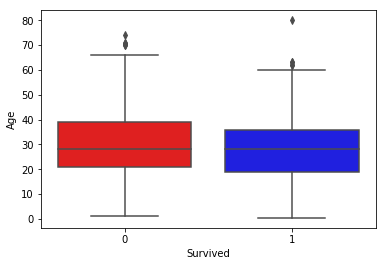

In [10]:
sns.boxplot(x="Survived", y="Age",
            palette=["r", "b"], data=train_data)

plt.show()

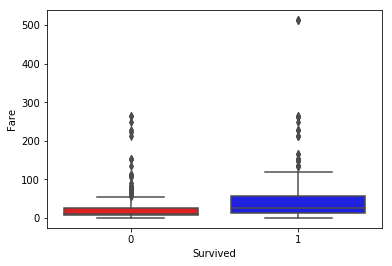

In [11]:
sns.boxplot(x="Survived", y="Fare",
            palette=["r", "b"], data=train_data)

plt.show()

En conclusión no existen diferencias significativas en los valores de estas variables como para poder descartarlas.

## Parte 2: Análisis de Exploratorio de Datos

En esta parte se hace un análisis exploratorio de datos para determinar: 

- ¿Existe alguna relación dichas variables?
- ¿Qué atributos del conjunto de entrenamiento tienen una mayor implicancia sobre la variable final de decisión?

In [12]:
import seaborn as sns
corr = train_data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


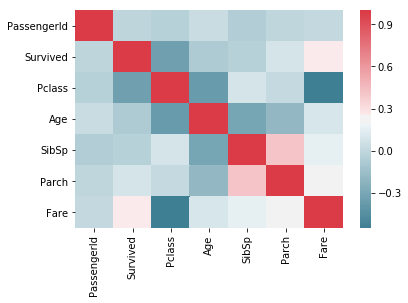

In [13]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=cmap)
plt.show()

In [14]:
# Se define una función para generar gráficos de barra entre algunos elementos
# de la data.
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

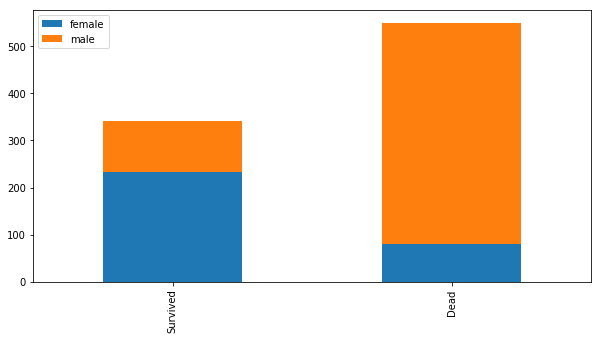

In [15]:
bar_chart('Sex')

In [34]:
qty_sex = train_data['Sex'].value_counts()
qty_sex_survived = train_data[train_data['Survived']==1]['Sex'].value_counts()

# Porcentaje de Sobrevivientes por Género vs Totales
print('% mujeres que sobrevivieron vs tamaño muestra: ',
      qty_sex_survived['female']/train_data.shape[0] * 100, '%')
print('% hombres que sobrevivieron vs tamaño muestra: ',
      qty_sex_survived['male']/train_data.shape[0] * 100, '%')

print("")

# Porcentaje de Sobrevivientes por Género vs Género
print('% mujeres que sobrevivieron vs mujeres totales: ',
      qty_sex_survived['female']/qty_sex['female'] * 100, '%')
print('% hombres que sobrevivieron vs hombres totales: ',
      qty_sex_survived['male']/qty_sex['male'] * 100, '%')

% mujeres que sobrevivieron vs tamaño muestra:  26.15039281705948 %
% hombres que sobrevivieron vs tamaño muestra:  12.2334455667789 %

% mujeres que sobrevivieron vs mujeres totales:  74.20382165605095 %
% hombres que sobrevivieron vs hombres totales:  18.890814558058924 %


### Obs.
Se puede concluir que el sexo del tripulante es una variable que impacta en la probabilidad de supervivencia. El tripulante tiene mayor probabilidad de sobrevivir si es mujer y menor probabilidad de sobrevivir si es hombre.

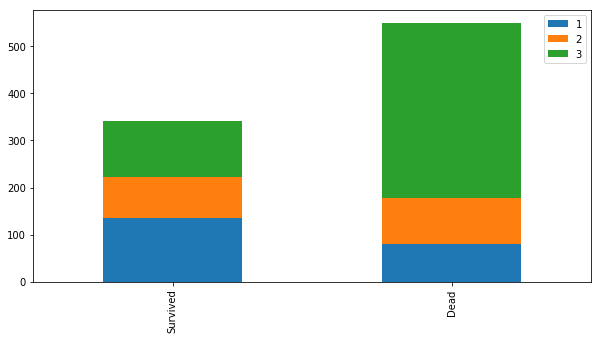

In [35]:
bar_chart('Pclass')

In [36]:
qty_pclass = train_data['Pclass'].value_counts()
qty_pclass_survived = train_data[train_data['Survived']==1]['Pclass'].value_counts()

# Porcentaje de Sobrevivientes por Género vs Totales
print('% class 1 que sobrevivieron vs tamaño muestra: ',
      qty_pclass_survived[1]/train_data.shape[0] * 100, '%')
print('% class 2 que sobrevivieron vs tamaño muestra: ',
      qty_pclass_survived[2]/train_data.shape[0] * 100, '%')
print('% class 3 que sobrevivieron vs tamaño muestra: ',
      qty_pclass_survived[3]/train_data.shape[0] * 100, '%')

print("")

# Porcentaje de Sobrevivientes por Género vs Género
print('% class 1 que sobrevivieron vs class 1 totales: ',
      qty_pclass_survived[1]/qty_pclass[1] * 100, '%')
print('% class 2 que sobrevivieron vs class 2 totales: ',
      qty_pclass_survived[2]/qty_pclass[2] * 100, '%')
print('% class 3 que sobrevivieron vs class 3 totales: ',
      qty_pclass_survived[3]/qty_pclass[3] * 100, '%')

% class 1 que sobrevivieron vs tamaño muestra:  15.26374859708193 %
% class 2 que sobrevivieron vs tamaño muestra:  9.764309764309765 %
% class 3 que sobrevivieron vs tamaño muestra:  13.35578002244669 %

% class 1 que sobrevivieron vs class 1 totales:  62.96296296296296 %
% class 2 que sobrevivieron vs class 2 totales:  47.28260869565217 %
% class 3 que sobrevivieron vs class 3 totales:  24.236252545824847 %


### Obs.
Se puede concluir que la clase del tripulante es una variable que impacta en la probabilidad de supervivencia. Mientras más acomodada fue la clase en Titanic, mayor probabilidad tenía el tripulante de sobrevivir al desastre. Esto se puede deber a que la cantidad de flotadores y barcos, estaban reservados para las personas que compraban pasajes de primera clase, mientras que los que compraban pasajes de tercera clase, no poseían estos privilegios.

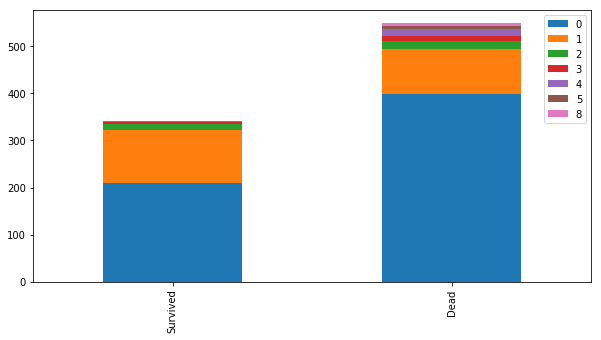

In [65]:
bar_chart('SibSp')

In [57]:
qty_sibsp = train_data['SibSp'].value_counts()
qty_sibsp_survived = train_data[train_data['Survived']==1]['SibSp'].value_counts()

# Porcentaje de Sobrevivientes por ctdad de Hermanos y Esposa vs Totales
print('% personas con 0 esposa/hermanos que sobrevivieron vs tamaño muestra: ',
      '{0:.2f}'.format(qty_sibsp_survived[0]/train_data.shape[0] * 100), '%')
print('% personas con 1 esposa/hermanos que sobrevivieron vs tamaño muestra: ',
      '{0:.2f}'.format(qty_sibsp_survived[1]/train_data.shape[0] * 100), '%')
print('% personas con 2 esposa/hermanos que sobrevivieron vs tamaño muestra: ',
      '{0:.2f}'.format(qty_sibsp_survived[2]/train_data.shape[0] * 100), '%')
print('% personas con 3 esposa/hermanos que sobrevivieron vs tamaño muestra: ',
      '{0:.2f}'.format(qty_sibsp_survived[3]/train_data.shape[0] * 100), '%')
print('% personas con 4 esposa/hermanos que sobrevivieron vs tamaño muestra: ',
      '{0:.2f}'.format(qty_sibsp_survived[4]/train_data.shape[0] * 100), '%')


print("")

# Porcentaje de Sobrevivientes por Género vs Género
print('% personas con 0 esposa/hermanos que sobrevivieron vs ' +
      'personas con 0 esposa/hermanos totales: ',
      '{0:.2f}'.format(qty_sibsp_survived[0]/qty_sibsp[0] * 100), '%')
print('% personas con 1 esposa/hermanos que sobrevivieron vs ' +
      'personas con 1 esposa/hermanos totales: ',
      '{0:.2f}'.format(qty_sibsp_survived[1]/qty_sibsp[1] * 100), '%')
print('% personas con 2 esposa/hermanos que sobrevivieron vs ' +
      'personas con 2 esposa/hermanos totales: ',
      '{0:.2f}'.format(qty_sibsp_survived[2]/qty_sibsp[2] * 100), '%')
print('% personas con 3 esposa/hermanos que sobrevivieron vs ' +
      'personas con 3 esposa/hermanos totales: ',
      '{0:.2f}'.format(qty_sibsp_survived[3]/qty_sibsp[3] * 100), '%')
print('% personas con 4 esposa/hermanos que sobrevivieron vs ' +
      'personas con 4 esposa/hermanos totales: ',
      '{0:.2f}'.format(qty_sibsp_survived[4]/qty_sibsp[4] * 100), '%')

% personas con 0 esposa/hermanos que sobrevivieron vs tamaño muestra:  23.57 %
% personas con 1 esposa/hermanos que sobrevivieron vs tamaño muestra:  12.57 %
% personas con 2 esposa/hermanos que sobrevivieron vs tamaño muestra:  1.46 %
% personas con 3 esposa/hermanos que sobrevivieron vs tamaño muestra:  0.45 %
% personas con 4 esposa/hermanos que sobrevivieron vs tamaño muestra:  0.34 %

% personas con 0 esposa/hermanos que sobrevivieron vs personas con 0 esposa/hermanos totales:  34.54 %
% personas con 1 esposa/hermanos que sobrevivieron vs personas con 1 esposa/hermanos totales:  53.59 %
% personas con 2 esposa/hermanos que sobrevivieron vs personas con 2 esposa/hermanos totales:  46.43 %
% personas con 3 esposa/hermanos que sobrevivieron vs personas con 3 esposa/hermanos totales:  25.00 %
% personas con 4 esposa/hermanos que sobrevivieron vs personas con 4 esposa/hermanos totales:  16.67 %


### Obs.
Se puede concluir que la cantidad de hermanos/esposa del tripulante es una variable que impacta en la probabilidad de supervivencia en el siguiente orden. 
- 1 hermano/esposa
- 2 hermanos/esposa, 
- 0 hermanos/esposa
- 3 hermanos/esposa
- 4 hermanos/esposa

Por otro lado, como había más tripulantes sin parentezco de hermanos o esposa, fueron el grupo en el cual se salvo más personas, con un 23.57%.

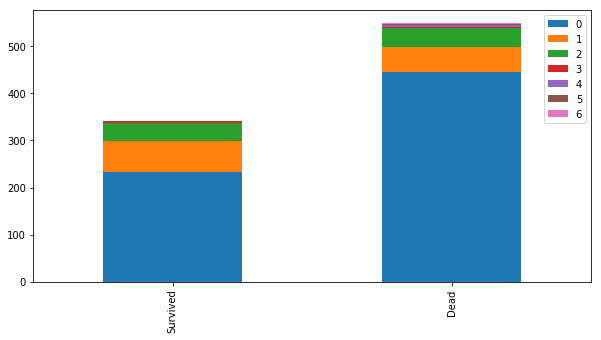

In [18]:
bar_chart('Parch')

In [64]:
qty_parch = train_data['Parch'].value_counts()
qty_parch_survived = train_data[train_data['Survived']==1]['Parch'].value_counts()

# Porcentaje de Sobrevivientes por ctdad de Hermanos y Esposa vs Totales
print('% personas con 0 padres/hijos que sobrevivieron vs tamaño muestra: ',
      '{0:.2f}'.format(qty_parch_survived[0]/train_data.shape[0] * 100), '%')
print('% personas con 1 padres/hijos que sobrevivieron vs tamaño muestra: ',
      '{0:.2f}'.format(qty_parch_survived[1]/train_data.shape[0] * 100), '%')
print('% personas con 2 padres/hijos que sobrevivieron vs tamaño muestra: ',
      '{0:.2f}'.format(qty_parch_survived[2]/train_data.shape[0] * 100), '%')
print('% personas con 3 padres/hijos que sobrevivieron vs tamaño muestra: ',
      '{0:.2f}'.format(qty_parch_survived[3]/train_data.shape[0] * 100), '%')


print("")

# Porcentaje de Sobrevivientes por Género vs Género
print('% personas con 0 padre/hijo que sobrevivieron vs ' +
      'personas con 0 padre/hijo totales: ',
      '{0:.2f}'.format(qty_parch_survived[0]/qty_parch[0] * 100), '%')
print('% personas con 1 padres/hijos que sobrevivieron vs ' +
      'personas con 1 padre/hijo totales: ',
      '{0:.2f}'.format(qty_parch_survived[1]/qty_parch[1] * 100), '%')
print('% personas con 2 padres/hijos que sobrevivieron vs ' +
      'personas con 2 padres/hijos totales: ',
      '{0:.2f}'.format(qty_parch_survived[2]/qty_parch[2] * 100), '%')
print('% personas con 3 padres/hijos que sobrevivieron vs ' +
      'personas con 3 padres/hijos totales: ',
      '{0:.2f}'.format(qty_parch_survived[3]/qty_parch[3] * 100), '%')

% personas con 0 padres/hijos que sobrevivieron vs tamaño muestra:  26.15 %
% personas con 1 padres/hijos que sobrevivieron vs tamaño muestra:  7.30 %
% personas con 2 padres/hijos que sobrevivieron vs tamaño muestra:  4.49 %
% personas con 3 padres/hijos que sobrevivieron vs tamaño muestra:  0.34 %

% personas con 0 padre/hijo que sobrevivieron vs personas con 0 padre/hijo totales:  34.37 %
% personas con 1 padres/hijos que sobrevivieron vs personas con 1 padre/hijo totales:  55.08 %
% personas con 2 padres/hijos que sobrevivieron vs personas con 2 padres/hijos totales:  50.00 %
% personas con 3 padres/hijos que sobrevivieron vs personas con 3 padres/hijos totales:  60.00 %


### Obs.
Se puede concluir que la cantidad de padres/hijos del tripulante es una variable que impacta en la probabilidad de supervivencia en el siguiente orden. 
- 3 padres/hijos
- 1 padre/hijo
- 2 padres/hijos
- 0 padres/hijos

Por otro lado, como había más tripulantes sin parentezco de padres o hijos, fueron el grupo en el cual se salvo más personas, con un 26.15%.

Este fenómenos se puede deber a que los niños, tienen prioridad para acceder a salvavidas y botes, al igual que las mujeres. Además, tenemos la certeza de que los niños venían con algun acompañante adulto (padre, madre, tutor, etc.) que probablemente también ganaría el privilegio de acompañar a dicho niño, para poder hacerse cargo de él posteriormente.

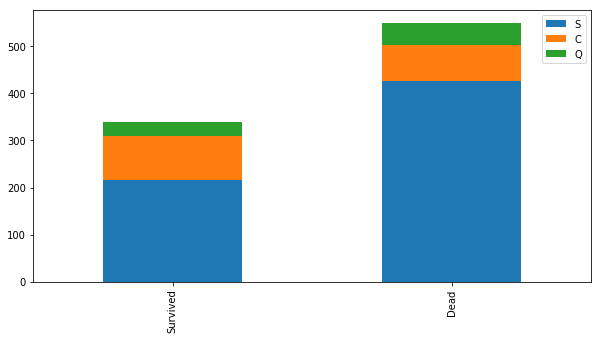

In [19]:
bar_chart('Embarked')

In [68]:
qty_embarked = train_data['Embarked'].value_counts()
qty_embarked_survived = train_data[train_data['Survived']==1]['Embarked'].value_counts()

# Porcentaje de Sobrevivientes por Puerto de Embarque
print('% Puerto S que sobrevivieron vs tamaño muestra: ',
      qty_embarked_survived['S']/train_data.shape[0] * 100, '%')
print('% Puerto C que sobrevivieron vs tamaño muestra: ',
      qty_embarked_survived['C']/train_data.shape[0] * 100, '%')
print('% Puerto Q que sobrevivieron vs tamaño muestra: ',
      qty_embarked_survived['Q']/train_data.shape[0] * 100, '%')

print("")

# Porcentaje de Sobrevivientes por Género vs Género
print('% Puerto S que sobrevivieron vs Puerto S totales: ',
      qty_embarked_survived['S']/qty_embarked['S'] * 100, '%')
print('% Puerto C que sobrevivieron vs Puerto C totales: ',
      qty_embarked_survived['C']/qty_embarked['C'] * 100, '%')
print('% Puerto Q que sobrevivieron vs Puerto Q totales: ',
      qty_embarked_survived['Q']/qty_embarked['Q'] * 100, '%')

% Puerto S que sobrevivieron vs tamaño muestra:  24.354657687991022 %
% Puerto C que sobrevivieron vs tamaño muestra:  10.437710437710438 %
% Puerto Q que sobrevivieron vs tamaño muestra:  3.3670033670033668 %

% Puerto S que sobrevivieron vs Puerto S totales:  33.69565217391305 %
% Puerto C que sobrevivieron vs Puerto C totales:  55.35714285714286 %
% Puerto Q que sobrevivieron vs Puerto Q totales:  38.961038961038966 %


### Obs.
Hay una ligera tendencia a que los tripulantes del Puerto C sobrevivan. El resto se mantiene estable dentro de la medición.

Habría que estudiar la variable más a fondo para poder determinar realmente qué es lo que impacta esta gran diferencia.